In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('ratings.csv')
ratings.head(5)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100814,7,15-07-21,Tremors,https://www.imdb.com/title/tt0100814/,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,Ron Underwood
1,tt1028532,7,05-04-21,Hachi: A Dog's Tale,https://www.imdb.com/title/tt1028532/,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,Lasse Hallström
2,tt0102926,6,27-04-21,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,Jonathan Demme
3,tt1033575,6,15-07-21,The Descendants,https://www.imdb.com/title/tt1033575/,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,Alexander Payne
4,tt1037705,7,15-07-21,The Book of Eli,https://www.imdb.com/title/tt1037705/,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,"Allen Hughes, Albert Hughes"


In [3]:
df = ratings.loc[:, ['Title','Your Rating', 'Date Rated', 'Title Type','IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes', 'Release Date', 'Directors']]

In [4]:
df.isnull().sum()

Title              0
Your Rating        0
Date Rated         0
Title Type         0
IMDb Rating        0
Runtime (mins)     1
Year               0
Genres             0
Num Votes          0
Release Date       2
Directors         11
dtype: int64

In [5]:
column_info = pd.DataFrame({
    'Column': df.columns,
    'dtype': df.dtypes,
    'Unique Values': df.nunique()
}).reset_index(drop=True)

column_info

,Column,dtype,Unique Values
0,Title,object,462
1,Your Rating,int64,9
2,Date Rated,object,56
3,Title Type,object,8
4,IMDb Rating,float64,50
5,Runtime (mins),float64,103
6,Year,int64,42
7,Genres,object,208
8,Num Votes,int64,463
9,Release Date,object,441


### Plots to understand columns

In [6]:
df['Title Type'].value_counts()

movie            447
tvSeries           8
tvSpecial          2
tvMiniSeries       2
video              1
podcastSeries      1
tvShort            1
tvEpisode          1
Name: Title Type, dtype: int64

Text(0, 0.5, 'Count')

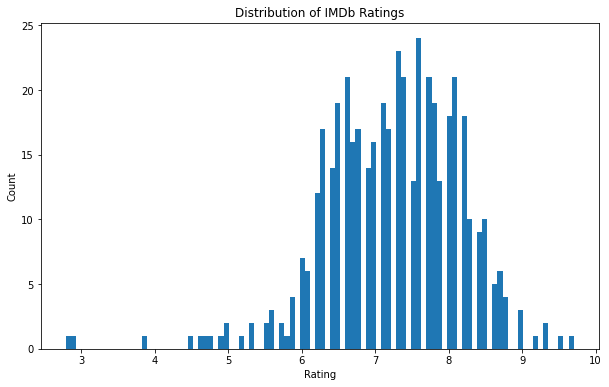

In [7]:
df['IMDb Rating'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

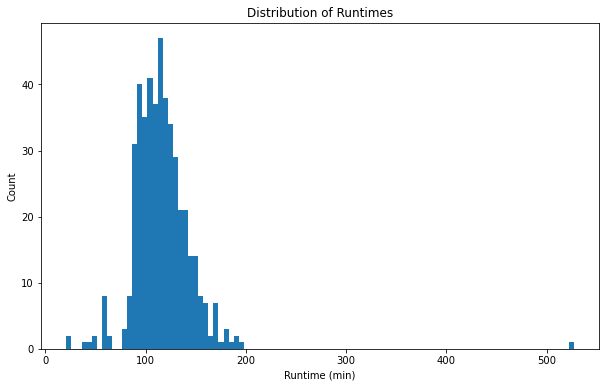

In [8]:
df['Runtime (mins)'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of Runtimes')
plt.xlabel('Runtime (min)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

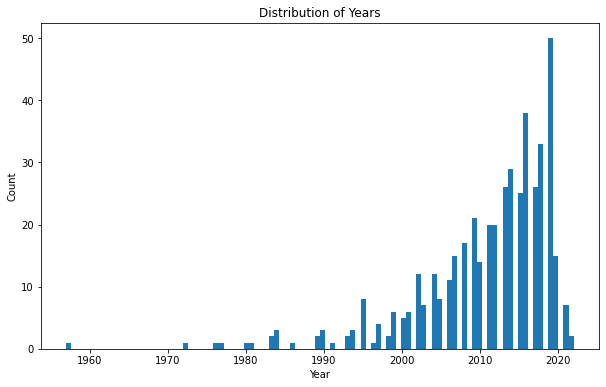

In [9]:
df['Year'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')

#### Plot Datetimes

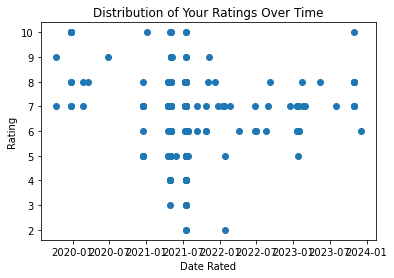

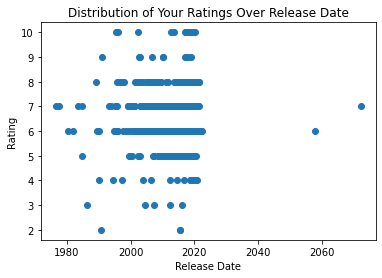

In [10]:
df['Date Rated dt'] = pd.to_datetime(df['Date Rated'])
df['Release Date dt'] = pd.to_datetime(df['Release Date'])
df_timeseries = df.set_index('Date Rated dt').sort_index()

plt.scatter(df_timeseries.index, df_timeseries['Your Rating'])
plt.title('Distribution of Your Ratings Over Time')
plt.xlabel('Date Rated')
plt.ylabel('Rating')
plt.show()

df_timeseries = df.set_index('Release Date dt').sort_index()
plt.scatter(df_timeseries.index, df['Your Rating'])
plt.title('Distribution of Your Ratings Over Release Date')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.show()

In [11]:
## Extract year and month information from datetimes

df['Date Rated Year'] = df['Date Rated dt'].dt.year
df['Date Rated Month'] = df['Date Rated dt'].dt.month
df['Release Date Year'] = df['Release Date dt'].dt.year
df['Release Date Month'] = df['Release Date dt'].dt.month
df.head(5)

,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Date Rated dt,Release Date dt,Date Rated Year,Date Rated Month,Release Date Year,Release Date Month
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,Ron Underwood,2021-07-15,1990-01-19,2021,7,1990.0,1.0
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,Lasse Hallström,2021-05-04,2009-06-13,2021,5,2009.0,6.0
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,Jonathan Demme,2021-04-27,1991-01-30,2021,4,1991.0,1.0
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,Alexander Payne,2021-07-15,2011-02-09,2021,7,2011.0,2.0
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,"Allen Hughes, Albert Hughes",2021-07-15,2010-11-01,2021,7,2010.0,11.0


### Generate distinct columns for Genres

In [12]:
df['Genres'].value_counts()

Drama                                                                   18
Action, Adventure, Sci-Fi                                               16
Action, Adventure, Fantasy, Sci-Fi                                      15
Comedy                                                                  15
Comedy, Drama                                                           14
                                                                        ..
Biography, Crime, Drama, History, Mystery                                1
Animation, Action, Adventure, Comedy, Crime, Family, Mystery, Sci-Fi     1
Action, Adventure, Drama, Sci-Fi, Thriller                               1
Animation, Adventure, Comedy, Drama, Family, Fantasy                     1
Comedy, Family                                                           1
Name: Genres, Length: 208, dtype: int64

In [13]:
df['Genres Split'] = df.apply(lambda x: [part.strip() for part in x['Genres'].split(',')], axis=1)
df.head(5)

,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Date Rated dt,Release Date dt,Date Rated Year,Date Rated Month,Release Date Year,Release Date Month,Genres Split
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,Ron Underwood,2021-07-15,1990-01-19,2021,7,1990.0,1.0,"[Comedy, Horror]"
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,Lasse Hallström,2021-05-04,2009-06-13,2021,5,2009.0,6.0,"[Biography, Drama, Family]"
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,Jonathan Demme,2021-04-27,1991-01-30,2021,4,1991.0,1.0,"[Crime, Drama, Thriller]"
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,Alexander Payne,2021-07-15,2011-02-09,2021,7,2011.0,2.0,"[Comedy, Drama]"
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,"Allen Hughes, Albert Hughes",2021-07-15,2010-11-01,2021,7,2010.0,11.0,"[Action, Adventure, Drama, Thriller]"


In [14]:
encoded_columns = pd.get_dummies(df['Genres Split'].apply(pd.Series).stack()).sum(level=0)

# Concatenate encoded columns with the original DataFrame
df = pd.concat([df, encoded_columns], axis=1)
df.head(5)

C:\Users\batuk\AppData\Local\Temp/ipykernel_9888/2855483109.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_columns = pd.get_dummies(df['Genres Split'].apply(pd.Series).stack()).sum(level=0)


,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,...,0,0,0,0,0,0,0,0,0,0
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,...,0,0,0,0,0,0,0,0,0,0
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,...,0,0,0,0,0,0,0,1,0,0
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,...,0,0,0,0,0,0,0,0,0,0
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,...,0,0,0,0,0,0,0,1,0,0


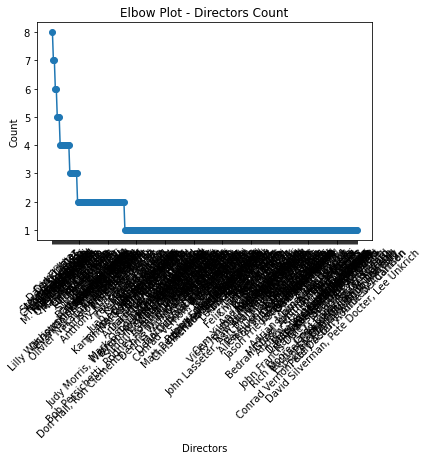

In [15]:
directors_count = df['Directors'].value_counts()

plt.plot(directors_count.index, directors_count.values, marker='o')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Elbow Plot - Directors Count')
plt.xticks(rotation=45)
plt.show()

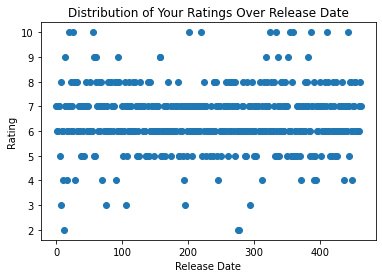

In [16]:
plt.scatter(df.index, df['Your Rating'])
plt.title('Distribution of Your Ratings Over Release Date')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.show()

In [17]:
directors_remark = directors_count[directors_count > 3].index.tolist()
df['DirectorRemark'] = df['Directors'].apply(lambda x: 1 if x in directors_remark else 0)

### Encoding for titles

In [18]:
### One Hot Encoding Title Type (Regression)

# Perform one-hot encoding
encoded_columns = pd.get_dummies(df['Title Type'], prefix='Title')

# Concatenate encoded columns with the original DataFrame
df = pd.concat([df, encoded_columns], axis=1)


#### Label Encoding Title Type (Trees)

# Perform label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Title Type Label'] = le.fit_transform(df['Title Type']) 
df.head(5)

,Title,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,DirectorRemark,Title_movie,Title_podcastSeries,Title_tvEpisode,Title_tvMiniSeries,Title_tvSeries,Title_tvShort,Title_tvSpecial,Title_video,Title Type Label
0,Tremors,7,15-07-21,movie,7.1,96.0,1990,"Comedy, Horror",143582,19-01-90,...,0,1,0,0,0,0,0,0,0,0
1,Hachi: A Dog's Tale,7,05-04-21,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,13-06-09,...,0,1,0,0,0,0,0,0,0,0
2,The Silence of the Lambs,6,27-04-21,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,30-01-91,...,0,1,0,0,0,0,0,0,0,0
3,The Descendants,6,15-07-21,movie,7.3,115.0,2011,"Comedy, Drama",245809,02-09-11,...,0,1,0,0,0,0,0,0,0,0
4,The Book of Eli,7,15-07-21,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,11-01-10,...,0,1,0,0,0,0,0,0,0,0


In [19]:
df.dropna(inplace=True)
df.isnull().sum()

Title                  0
Your Rating            0
Date Rated             0
Title Type             0
IMDb Rating            0
Runtime (mins)         0
Year                   0
Genres                 0
Num Votes              0
Release Date           0
Directors              0
Date Rated dt          0
Release Date dt        0
Date Rated Year        0
Date Rated Month       0
Release Date Year      0
Release Date Month     0
Genres Split           0
Action                 0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Short                  0
Sport                  0
Thriller               0
War                    0
Western                0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Your Rating'], df['Your Rating'], test_size=0.2, random_state=42)

## Linear Models

In [21]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [22]:
#### Choose features for regression models

features = ['IMDb Rating','Runtime (mins)', 'Num Votes', 'DirectorRemark','Title_movie', 'Title_tvSeries', 'Title_tvSpecial', 'Title_video',  'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',  'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
X_train = X_train_copy[features]
X_test = X_test_copy[features]

In [23]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_train = pd.DataFrame(mmscaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(mmscaler.transform(X_test), columns=X_test.columns)

#### Linear Regression

MAPE for linear regression training: 0.1446974182768706
MAPE for linear regression testing: 0.14213006749699927


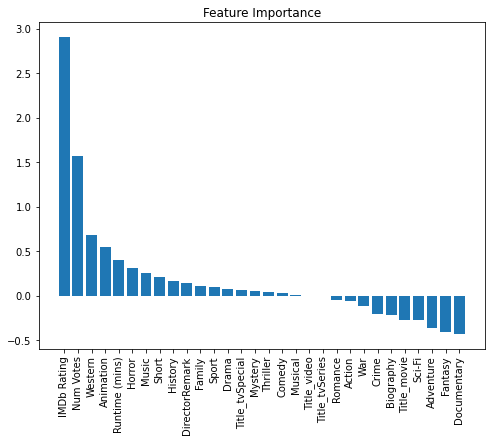

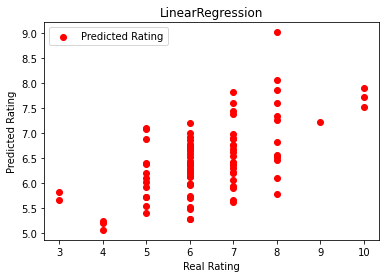

In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

def linear_regression(df, X_train, X_test, y_train, y_test):
    model = LinearRegression()
    scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=5)
    mean_error = np.mean(scores)
    print("MAPE for linear regression training:", mean_error)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for linear regression testing:", mape)

    return model

def regression_report(model, X_train, X_test, y_test, df):

   # Print the feature importance
    importances = model.coef_
    feature_names = X_train.columns 
    indices = np.argsort(importances)[::-1]
    names = [feature_names[i] for i in indices]
    plt.figure(figsize=(8, 6))
    plt.title("Feature Importance")
    plt.bar(range(X_train.shape[1]), importances[indices])
    plt.xticks(range(X_train.shape[1]), names, rotation=90)
    plt.show()

    # Print the prediction accuracy
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, color='red', label='Predicted Rating')
    plt.xlabel('Real Rating')
    plt.ylabel('Predicted Rating')
    plt.title(model.__class__.__name__)
    plt.legend()
    plt.show()

    

model = linear_regression(df, X_train, X_test, y_train, y_test)
df['Prediction_LinearReg'] = model.predict(mmscaler.transform(df[features]))
regression_report(model, X_train, X_test, y_test, df)

### Ridge Regression

[I 2023-06-28 14:12:47,605] A new study created in memory with name: RidgeRegression
[I 2023-06-28 14:12:47,651] Trial 0 finished with value: -0.1428577131600171 and parameters: {'alpha': 0.031933869420730315, 'solver': 'saga'}. Best is trial 0 with value: -0.1428577131600171.
[I 2023-06-28 14:12:47,684] Trial 1 finished with value: -0.14304700197064335 and parameters: {'alpha': 0.006710323708150225, 'solver': 'lsqr'}. Best is trial 0 with value: -0.1428577131600171.
[I 2023-06-28 14:12:47,713] Trial 2 finished with value: -0.14299800758463924 and parameters: {'alpha': 1.1882596217191702e-05, 'solver': 'svd'}. Best is trial 0 with value: -0.1428577131600171.
[I 2023-06-28 14:12:47,769] Trial 3 finished with value: -0.14300979050984203 and parameters: {'alpha': 0.0006853825675232427, 'solver': 'sag'}. Best is trial 0 with value: -0.1428577131600171.
[I 2023-06-28 14:12:47,794] Trial 4 finished with value: -0.14299797577224355 and parameters: {'alpha': 2.2662083994891077e-05, 'solver': '

Best parameters for ridge regression {'alpha': 0.9268712097085662, 'solver': 'auto'}
Best MAPE score for ridge regression training: 0.1418888431748499
MAPE for ridge regression testing: 0.14336557112405884


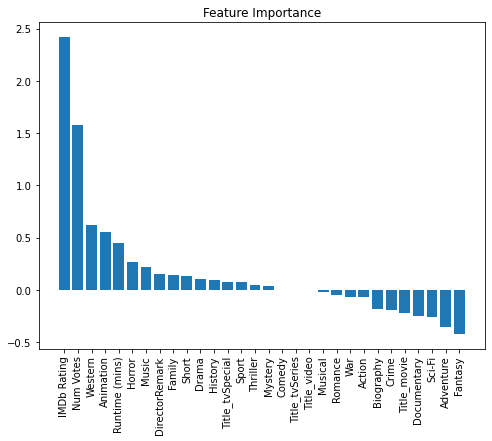

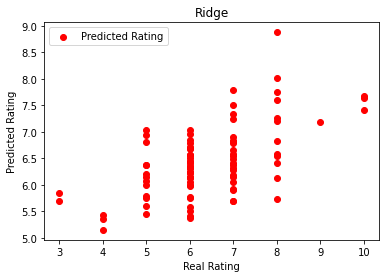

In [39]:
import warnings
import optuna
from optuna.visualization import plot_optimization_history
import plotly.io as pio
import numpy as np
from sklearn.linear_model import Ridge

# Ignore all warnings
warnings.filterwarnings("ignore")

def ridge_regression(df, X_train, X_test, y_train, y_test):

    def objective(trial):
        param = {
            'alpha' : trial.suggest_loguniform('alpha', 1e-5, 10.0),
            'solver' : trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'])
        }
        model = Ridge(**param)
        scores = cross_val_score(model, X_train, y_train, 
                                 cv=KFold(n_splits=5,
                                          shuffle=True,
                                          random_state=42),
                                 scoring='neg_mean_absolute_percentage_error'
                                ) # Train set is split into 3 folds, the model is trained on 2 folds and evaluated on the remaining fold. This is repeated 3 times, and the average of the 3 scores is returned.
        # Return the mean of 3 scores
        return scores.mean()
    
    study = optuna.create_study(direction='maximize', study_name='RidgeRegression')
    study.optimize(objective, n_trials=50) # n_trials is the number of trials to run, each run is evaluated by cross validation score
    fig = plot_optimization_history(study)
    pio.show(fig)
    
    print('Best parameters for ridge regression', study.best_params)
    print('Best MAPE score for ridge regression training:', -1*study.best_value)
    
    model = Ridge(**study.best_params)
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for ridge regression testing:", mape)

    return model

model = ridge_regression(df, X_train, X_test, y_train, y_test)
df['Prediction_RidgeReg'] = model.predict(mmscaler.transform(df[features]))
regression_report(model, X_train, X_test, y_test, df)


### Lasso Regression

[I 2023-06-28 14:14:23,324] A new study created in memory with name: LassoRegression
[I 2023-06-28 14:14:23,350] Trial 0 finished with value: -0.1454225665547379 and parameters: {'alpha': 0.024493021527068667, 'selection': 'random'}. Best is trial 0 with value: -0.1454225665547379.
[I 2023-06-28 14:14:23,377] Trial 1 finished with value: -0.142079255500463 and parameters: {'alpha': 0.000962939084880395, 'selection': 'random'}. Best is trial 1 with value: -0.142079255500463.
[I 2023-06-28 14:14:23,404] Trial 2 finished with value: -0.14274434945567255 and parameters: {'alpha': 0.00030681402760092245, 'selection': 'random'}. Best is trial 1 with value: -0.142079255500463.
[I 2023-06-28 14:14:23,426] Trial 3 finished with value: -0.16856463492675877 and parameters: {'alpha': 2.0227224883263037, 'selection': 'cyclic'}. Best is trial 1 with value: -0.142079255500463.
[I 2023-06-28 14:14:23,458] Trial 4 finished with value: -0.16856463492675877 and parameters: {'alpha': 0.8124616287966228, '

Best parameters for lasso regression {'alpha': 0.005410816954766625, 'selection': 'cyclic'}
Best MAPE score for lasso regression training: 0.14042910162353406


MAPE for lasso regression testing: 0.14093915233428064


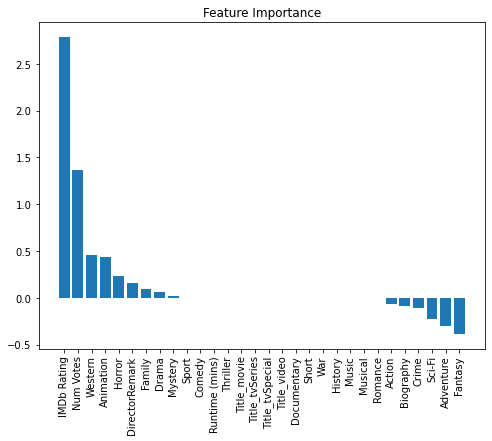

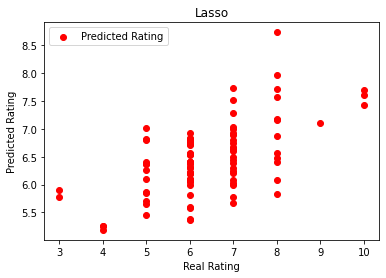

In [40]:
### Lasso Regression

import warnings
import optuna
from optuna.visualization import plot_optimization_history
import plotly.io as pio
import numpy as np
from sklearn.linear_model import Lasso

# Ignore all warnings
warnings.filterwarnings("ignore")

def lasso_regression(df, X_train, X_test, y_train, y_test):

    def objective(trial):
        param = {
            'alpha' : trial.suggest_loguniform('alpha', 1e-5, 10.0),
            'selection' : trial.suggest_categorical('selection', ['cyclic', 'random'])
        }
        model = Lasso(**param)
        scores = cross_val_score(model, X_train, y_train, 
                                 cv=KFold(n_splits=5,
                                          shuffle=True,
                                          random_state=42),
                                 scoring='neg_mean_absolute_percentage_error'
                                ) # Train set is split into 3 folds, the model is trained on 2 folds and evaluated on the remaining fold. This is repeated 3 times, and the average of the 3 scores is returned.
        # Return the mean of 3 scores
        return scores.mean()
    
    study = optuna.create_study(direction='maximize', study_name='LassoRegression')
    study.optimize(objective, n_trials=50) # n_trials is the number of trials to run, each run is evaluated by cross validation score
    
    print('Best parameters for lasso regression', study.best_params)
    print('Best MAPE score for lasso regression training:', -1*study.best_value)
    
    model = Lasso(**study.best_params)
    model.fit(X_train, y_train)
    fig = plot_optimization_history(study)
    pio.show(fig)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for lasso regression testing:", mape)
    

    return model

model = lasso_regression(df, X_train, X_test, y_train, y_test)
df['Prediction_LassoReg'] = model.predict(mmscaler.transform(df[features]))
regression_report(model, X_train, X_test, y_test, df)


## Tree Based Models

In [ ]:
#### Choose features for tree based models
features = ['IMDb Rating','Runtime (mins)', 'Year','Num Votes', 'DirectorRemark', 'Date Rated Month', 'Date Rated Year', 'Title Type Label','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',  'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
X_train = X_train_copy[features]
X_test = X_test_copy[features]

### Decision Tree

[I 2023-06-28 15:45:39,831] A new study created in memory with name: DecisionTreeRegression
[I 2023-06-28 15:45:39,876] Trial 0 finished with value: -0.1502258969640241 and parameters: {'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 5, 'ccp_alpha': 0.08000204599599114}. Best is trial 0 with value: -0.1502258969640241.
[I 2023-06-28 15:45:39,902] Trial 1 finished with value: -0.1502258969640241 and parameters: {'max_depth': 46, 'min_samples_split': 11, 'min_samples_leaf': 2, 'ccp_alpha': 0.07516344593037982}. Best is trial 0 with value: -0.1502258969640241.
[I 2023-06-28 15:45:39,932] Trial 2 finished with value: -0.14902539979549825 and parameters: {'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 4, 'ccp_alpha': 0.13470987433340564}. Best is trial 2 with value: -0.14902539979549825.
[I 2023-06-28 15:45:39,960] Trial 3 finished with value: -0.16856463492675877 and parameters: {'max_depth': 32, 'min_samples_split': 10, 'min_samples_leaf': 8, 'ccp_alpha': 0.663

Best parameters for decision tree regression {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 8, 'ccp_alpha': 0.05004912397223116}
Best MAPE score for decision tree regression training: 0.1456351269282413


MAPE for decision tree regression testing: 0.1506053299635171


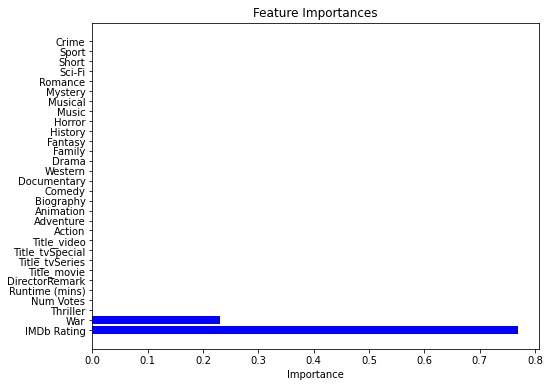

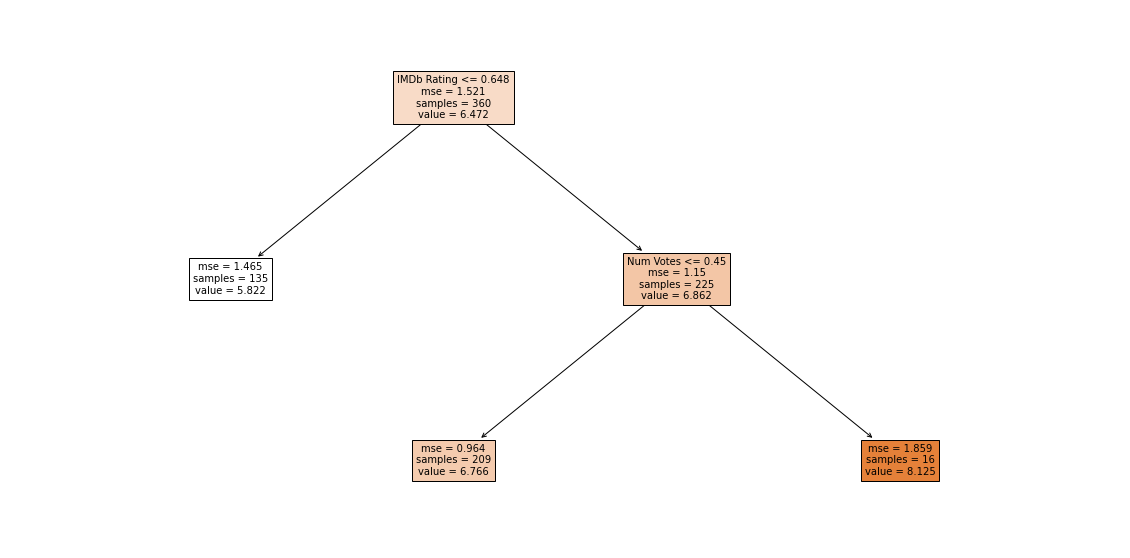

In [81]:
### Decision Tree
import warnings
import optuna
from optuna.visualization import plot_optimization_history
import plotly.io as pio
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Ignore all warnings
warnings.filterwarnings("ignore")

def decision_tree_regressor(df, X_train, X_test, y_train, y_test):

    def objective(trial):
        param = {
            'max_depth' : trial.suggest_int("max_depth", 10, 50),
            'min_samples_split' : trial.suggest_int("min_samples_split", 2, 20),
            'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 10),
            'ccp_alpha' : trial.suggest_float("ccp_alpha", 0.0, 1.0),
            'random_state' : 42
        }
        model = DecisionTreeRegressor(**param)
        scores = cross_val_score(model, X_train, y_train, 
                                 cv=KFold(n_splits=5,
                                          shuffle=True,
                                          random_state=42),
                                 scoring='neg_mean_absolute_percentage_error'
                                ) # Train set is split into 3 folds, the model is trained on 2 folds and evaluated on the remaining fold. This is repeated 3 times, and the average of the 3 scores is returned.
        # Return the mean of 3 scores
        return scores.mean()
    
    study = optuna.create_study(direction='maximize', study_name='DecisionTreeRegression')
    study.optimize(objective, n_trials=100) # n_trials is the number of trials to run, each run is evaluated by cross validation score
    
    print('Best parameters for decision tree regression', study.best_params)
    print('Best MAPE score for decision tree regression training:', -1*study.best_value)
    
    model = DecisionTreeRegressor(**study.best_params)
    model.fit(X_train, y_train)
    fig = plot_optimization_history(study)
    pio.show(fig)
    
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for decision tree regression testing:", mape)

    return model

def tree_report(model, X_train, X_test, y_test, df):

    ## Feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = [X_train.columns[i] for i in indices]
    plt.figure(figsize=(8, 6))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in range(len(indices))])
    plt.xlabel('Importance')
    plt.show()
    
    ## Tree visualization
    plt.figure(figsize=(20, 10))
    feature_names = X_train.columns
    tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)


model = decision_tree_regressor(df, X_train, X_test, y_train, y_test)
df['Prediction_DecisionTree'] = model.predict(df[features])
tree_report(model, X_train, X_test, y_test, df)


### Extreme Gradient Boosting

[I 2023-06-28 15:50:40,912] A new study created in memory with name: XGBRegression
[I 2023-06-28 15:50:43,405] Trial 0 finished with value: -0.14963043082906244 and parameters: {'max_depth': 6, 'learning_rate': 0.06345905631994496, 'n_estimators': 998, 'min_child_weight': 1, 'gamma': 0.8831358160610161, 'subsample': 0.38179529771536214, 'colsample_bytree': 0.3511850512239401, 'reg_alpha': 0.61471857166508, 'reg_lambda': 0.4640301259098637}. Best is trial 0 with value: -0.14963043082906244.
[I 2023-06-28 15:50:45,238] Trial 1 finished with value: -0.18550386336955654 and parameters: {'max_depth': 7, 'learning_rate': 0.9067104012988801, 'n_estimators': 642, 'min_child_weight': 8, 'gamma': 0.9961683425833914, 'subsample': 0.638649460005254, 'colsample_bytree': 0.8680511908167338, 'reg_alpha': 0.103907656846296, 'reg_lambda': 0.8243777646502907}. Best is trial 0 with value: -0.14963043082906244.
[I 2023-06-28 15:50:45,638] Trial 2 finished with value: -0.15561208128088158 and parameters: {

Best parameters for XGB regression {'max_depth': 6, 'learning_rate': 0.06345905631994496, 'n_estimators': 998, 'min_child_weight': 1, 'gamma': 0.8831358160610161, 'subsample': 0.38179529771536214, 'colsample_bytree': 0.3511850512239401, 'reg_alpha': 0.61471857166508, 'reg_lambda': 0.4640301259098637}
Best MAPE score for XGB regression training: 0.14963043082906244


MAPE for XGB regression testing: 0.15054574497582843


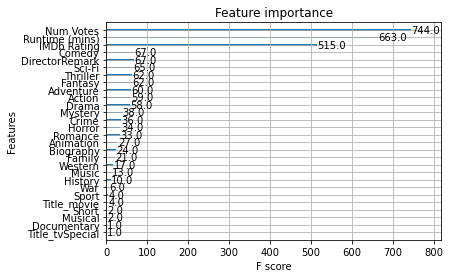

In [93]:
### XGBoost
import warnings
import optuna
from optuna.visualization import plot_optimization_history
import plotly.io as pio
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb

# Ignore all warnings
warnings.filterwarnings("ignore")

def xgboost_regressor(df, X_train, X_test, y_train, y_test):

    def objective(trial):
        param = {
            'max_depth': trial.suggest_int('max_depth', 1, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0.01, 1.0),
            'subsample': trial.suggest_float('subsample', 0.01, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
            'random_state': 42
        }
        model = xgb.XGBRegressor(**param)
        scores = cross_val_score(model, X_train, y_train, 
                                 cv=KFold(n_splits=5,
                                          shuffle=True,
                                          random_state=42),
                                 scoring='neg_mean_absolute_percentage_error'
                                ) # Train set is split into 3 folds, the model is trained on 2 folds and evaluated on the remaining fold. This is repeated 3 times, and the average of the 3 scores is returned.
        # Return the mean of 3 scores
        return scores.mean()
    
    study = optuna.create_study(direction='maximize', study_name='XGBRegression')
    study.optimize(objective, n_trials=10) # n_trials is the number of trials to run, each run is evaluated by cross validation score
    
    print('Best parameters for XGB regression', study.best_params)
    print('Best MAPE score for XGB regression training:', -1*study.best_value)
    
    model = xgb.XGBRegressor(**study.best_params)
    model.fit(X_train, y_train)
    fig = plot_optimization_history(study)
    pio.show(fig)
    
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for XGB regression testing:", mape)

    return model

def xgb_report(model, X_train, X_test, y_test, df):

    ## Feature importance
    xgb.plot_importance(model)
    plt.show()

model = xgboost_regressor(df, X_train, X_test, y_train, y_test)
df['Prediction_XGB'] = model.predict(df[features])
xgb_report(model, X_train, X_test, y_test, df)

### Light Gradient Boosting

In [100]:
param = {
            "objective": "regression",
            "metric": 'l2',
            "verbosity": -1,
            #"boosting_type": "gbdt",                
            "seed": 42,
            'lambda_l1': 10.0,
           
        }
model = lgb.LGBMRegressor(**param)
model.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10.0


LGBMRegressor(lambda_l1=10.0, metric='l2', objective='regression', seed=42,
              verbosity=-1)

[I 2023-06-28 16:02:42,291] A new study created in memory with name: LGBMRegression
[I 2023-06-28 16:02:42,389] Trial 0 finished with value: -0.15368369169968615 and parameters: {'metric': 'l1', 'lambda_l1': 5.190315903167964, 'lambda_l2': 0.41076859916896885, 'num_leaves': 26, 'feature_fraction': 0.5942973174722755, 'bagging_fraction': 0.25620008640466096, 'bagging_freq': 10, 'learning_rate': 0.989779559886912, 'num_boost_round': 191}. Best is trial 0 with value: -0.15368369169968615.


[LightGBM] [Warning] feature_fraction is set=0.5942973174722755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5942973174722755
[LightGBM] [Warning] lambda_l1 is set=5.190315903167964, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.190315903167964
[LightGBM] [Warning] bagging_fraction is set=0.25620008640466096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.25620008640466096
[LightGBM] [Warning] lambda_l2 is set=0.41076859916896885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41076859916896885
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=191, num_boost_round=191 will be ignored. Current value: num_iterations=191
[LightGBM] [Warning] feature_fraction is set=0.5942973174722755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5942973174722755
[LightGBM] [Warning] lambda_l1 is set=5.1903159

[I 2023-06-28 16:02:42,520] Trial 1 finished with value: -0.1459882597749916 and parameters: {'metric': 'l2', 'lambda_l1': 1.997697972059695, 'lambda_l2': 6.4507052430003, 'num_leaves': 43, 'feature_fraction': 0.7452681877848983, 'bagging_fraction': 0.5189621454616408, 'bagging_freq': 5, 'learning_rate': 0.16350068613191962, 'num_boost_round': 125}. Best is trial 1 with value: -0.1459882597749916.
[I 2023-06-28 16:02:42,669] Trial 2 finished with value: -0.154921656979967 and parameters: {'metric': 'l1', 'lambda_l1': 1.1537800993959118, 'lambda_l2': 9.14558727938969, 'num_leaves': 7, 'feature_fraction': 0.6779706648696198, 'bagging_fraction': 0.4081604356849797, 'bagging_freq': 9, 'learning_rate': 0.6536919210549103, 'num_boost_round': 106}. Best is trial 1 with value: -0.1459882597749916.


[LightGBM] [Warning] lambda_l1 is set=1.997697972059695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.997697972059695
[LightGBM] [Warning] bagging_fraction is set=0.5189621454616408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5189621454616408
[LightGBM] [Warning] lambda_l2 is set=6.4507052430003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.4507052430003
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=125, num_boost_round=125 will be ignored. Current value: num_iterations=125
[LightGBM] [Warning] feature_fraction is set=0.6779706648696198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779706648696198
[LightGBM] [Warning] lambda_l1 is set=1.1537800993959118, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1537800993959118
[LightGBM] [Warning] bagging_fraction is set=0.4081604356849797, subsample=1.0 w

[I 2023-06-28 16:02:42,781] Trial 3 finished with value: -0.15244339254149578 and parameters: {'metric': 'l2', 'lambda_l1': 9.249390796690909, 'lambda_l2': 6.356815437193974, 'num_leaves': 52, 'feature_fraction': 0.4695391801288221, 'bagging_fraction': 0.3899533760920876, 'bagging_freq': 7, 'learning_rate': 0.6842219655204004, 'num_boost_round': 136}. Best is trial 1 with value: -0.1459882597749916.
[I 2023-06-28 16:02:42,855] Trial 4 finished with value: -0.1468025680319644 and parameters: {'metric': 'l2', 'lambda_l1': 4.017979996834787, 'lambda_l2': 6.620886581803897, 'num_leaves': 60, 'feature_fraction': 0.6303789480911186, 'bagging_fraction': 0.51533886227646, 'bagging_freq': 12, 'learning_rate': 0.32612643120887475, 'num_boost_round': 36}. Best is trial 1 with value: -0.1459882597749916.


[LightGBM] [Warning] feature_fraction is set=0.4695391801288221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4695391801288221
[LightGBM] [Warning] lambda_l1 is set=9.249390796690909, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.249390796690909
[LightGBM] [Warning] bagging_fraction is set=0.3899533760920876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3899533760920876
[LightGBM] [Warning] lambda_l2 is set=6.356815437193974, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.356815437193974
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=136, num_boost_round=136 will be ignored. Current value: num_iterations=136
[LightGBM] [Warning] feature_fraction is set=0.4695391801288221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4695391801288221
[LightGBM] [Warning] lambda_l1 is set=9.249390796690909

[I 2023-06-28 16:02:42,924] Trial 5 finished with value: -0.1548049941871771 and parameters: {'metric': 'l1', 'lambda_l1': 8.271734984602864, 'lambda_l2': 0.7534569052269331, 'num_leaves': 3, 'feature_fraction': 0.6749212027644612, 'bagging_fraction': 0.16058303090479684, 'bagging_freq': 14, 'learning_rate': 0.41610247880138373, 'num_boost_round': 62}. Best is trial 1 with value: -0.1459882597749916.
[I 2023-06-28 16:02:43,028] Trial 6 finished with value: -0.14896292169453912 and parameters: {'metric': 'l1', 'lambda_l1': 3.7683201788564125, 'lambda_l2': 5.001838086982134, 'num_leaves': 11, 'feature_fraction': 0.7034484493387557, 'bagging_fraction': 0.5280764579753424, 'bagging_freq': 15, 'learning_rate': 0.4590465842754895, 'num_boost_round': 64}. Best is trial 1 with value: -0.1459882597749916.


[LightGBM] [Warning] lambda_l1 is set=8.271734984602864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.271734984602864
[LightGBM] [Warning] bagging_fraction is set=0.16058303090479684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.16058303090479684
[LightGBM] [Warning] lambda_l2 is set=0.7534569052269331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7534569052269331
[LightGBM] [Warning] bagging_freq is set=14, subsample_freq=0 will be ignored. Current value: bagging_freq=14
[LightGBM] [Warning] num_iterations is set=62, num_boost_round=62 will be ignored. Current value: num_iterations=62
[LightGBM] [Warning] feature_fraction is set=0.6749212027644612, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6749212027644612
[LightGBM] [Warning] lambda_l1 is set=8.271734984602864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.271734984602864
[LightGBM] [Warning] bagging_fraction is set=0.16058303090479684, subsample

[I 2023-06-28 16:02:43,103] Trial 7 finished with value: -0.1569858970575276 and parameters: {'metric': 'l2', 'lambda_l1': 0.6546395899454674, 'lambda_l2': 8.177454785746624, 'num_leaves': 4, 'feature_fraction': 0.5293504396571986, 'bagging_fraction': 0.24952683053624594, 'bagging_freq': 3, 'learning_rate': 0.6276591898866649, 'num_boost_round': 48}. Best is trial 1 with value: -0.1459882597749916.
[I 2023-06-28 16:02:43,229] Trial 8 finished with value: -0.1498280588395024 and parameters: {'metric': 'l2', 'lambda_l1': 7.760406261708316, 'lambda_l2': 9.585610128495606, 'num_leaves': 40, 'feature_fraction': 0.6282980234110151, 'bagging_fraction': 0.4537547349062233, 'bagging_freq': 3, 'learning_rate': 0.6161382015484328, 'num_boost_round': 177}. Best is trial 1 with value: -0.1459882597749916.


[LightGBM] [Warning] lambda_l1 is set=0.6546395899454674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6546395899454674
[LightGBM] [Warning] bagging_fraction is set=0.24952683053624594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.24952683053624594
[LightGBM] [Warning] lambda_l2 is set=8.177454785746624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.177454785746624
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=48, num_boost_round=48 will be ignored. Current value: num_iterations=48
[LightGBM] [Warning] feature_fraction is set=0.5293504396571986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5293504396571986
[LightGBM] [Warning] lambda_l1 is set=0.6546395899454674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6546395899454674
[LightGBM] [Warning] bagging_fraction is set=0.24952683053624594, subsample

[I 2023-06-28 16:02:43,376] Trial 9 finished with value: -0.14777495334542728 and parameters: {'metric': 'l2', 'lambda_l1': 8.073685572597894, 'lambda_l2': 3.7426848954163785, 'num_leaves': 31, 'feature_fraction': 0.26053570405558557, 'bagging_fraction': 0.4954465783175238, 'bagging_freq': 15, 'learning_rate': 0.6450594911849306, 'num_boost_round': 105}. Best is trial 1 with value: -0.1459882597749916.



[LightGBM] [Warning] lambda_l1 is set=8.073685572597894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.073685572597894
[LightGBM] [Warning] bagging_fraction is set=0.4954465783175238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4954465783175238
[LightGBM] [Warning] lambda_l2 is set=3.7426848954163785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7426848954163785
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] num_iterations is set=105, num_boost_round=105 will be ignored. Current value: num_iterations=105
[LightGBM] [Warning] feature_fraction is set=0.26053570405558557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.26053570405558557
[LightGBM] [Warning] lambda_l1 is set=8.073685572597894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.073685572597894
[LightGBM] [Warning] bagging_fraction is set=0.4954465783175238, subsam

MAPE for XGB regression testing: 0.14394679815643732


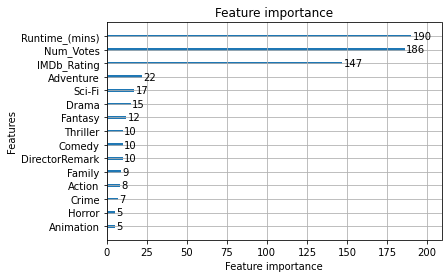

In [105]:
### LightGBM
import warnings
import optuna
from optuna.visualization import plot_optimization_history
import plotly.io as pio
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb

# Ignore all warnings
warnings.filterwarnings("ignore")

def lightgbm_regressor(df, X_train, X_test, y_train, y_test):

    def objective(trial):
        param = {
            "objective": "regression",
            "metric": trial.suggest_categorical('metric', ['l1', 'l2']),
            "verbosity": -1,
            "boosting_type": "gbdt",                
            "seed": 42,
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
            'num_leaves': trial.suggest_int('num_leaves', 2, 64),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
            'learning_rate': trial.suggest_float('learning_rate', 0.05, 1.0),
            'num_boost_round': trial.suggest_int('num_boost_round', 20, 200),
        }
        model = lgb.LGBMRegressor(**param)
        scores = cross_val_score(model, X_train, y_train, 
                                 cv=KFold(n_splits=5,
                                          shuffle=True,
                                          random_state=42),
                                 scoring='neg_mean_absolute_percentage_error'
                                ) # Train set is split into 3 folds, the model is trained on 2 folds and evaluated on the remaining fold. This is repeated 3 times, and the average of the 3 scores is returned.
        # Return the mean of 3 scores
        return scores.mean()
    
    study = optuna.create_study(direction='maximize', study_name='LGBMRegression')
    study.optimize(objective, n_trials=10) # n_trials is the number of trials to run, each run is evaluated by cross validation score
    
    print('Best parameters for XGB regression', study.best_params)
    print('Best MAPE score for XGB regression training:', -1*study.best_value)
    
    model = lgb.LGBMRegressor(**study.best_params)
    model.fit(X_train, y_train)
    fig = plot_optimization_history(study)
    pio.show(fig)
    
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE for XGB regression testing:", mape)

    return model

def lgb_report(model, X_train, X_test, y_test, df):

    ## Feature importance
    lgb.plot_importance(model)
    plt.show()

model = lightgbm_regressor(df, X_train, X_test, y_train, y_test)
df['Prediction_XGB'] = model.predict(df[features])
lgb_report(model, X_train, X_test, y_test, df)